Öğrenci Adı: ABDUL RAHMAN

Öğrenci Soyadı: KHANOUM

Öğrenci No: 2212721317

GitHub Projesi:
https://github.com/Abood88088/MLP_Flask-


---



📌 Çoklu Doğrusal Regresyon Tabanlı Araba Fiyat Tahmini ve Flask GUI Uygulaması

Bu çalışmada, ikinci el otomobillerin fiyatlarının; araç yaşı, motor hacmi, kilometre, beygir gücü ve marka gibi çeşitli bağımsız değişkenler kullanılarak tahmin edilmesini amaçlayan çoklu doğrusal regresyon tabanlı bir makine öğrenmesi modeli geliştirilmiştir.

Proje kapsamında kullanılan veri seti; farklı marka ve özelliklere sahip araçlara ait gerçekçi ve tutarlı değerlerden oluşturulmuştur. Veri seti üzerinde öncelikle keşifsel veri analizi (EDA) gerçekleştirilmiş, eksik ve anlamsız değişkenler analiz edilmiştir. Ardından OLS (Ordinary Least Squares) yöntemi kullanılarak regresyon modeli kurulmuş ve istatistiksel olarak anlamsız bulunan değişkenler p-value analizleri yardımıyla modelden çıkarılmıştır.

Modelin başarımı, eğitim ve test verileri üzerinde değerlendirilmiş; R² değeri, hata metrikleri ve “Gerçek vs Tahmin” grafikleri kullanılarak model performansı görselleştirilmiştir. Elde edilen sonuçlar, modelin araç fiyatlarını yüksek doğrulukla tahmin edebildiğini göstermektedir.

Eğitim süreci tamamlandıktan sonra elde edilen nihai regresyon modeli kaydedilmiş ve Flask framework’ü kullanılarak geliştirilen web tabanlı bir grafik kullanıcı arayüzüne (GUI) entegre edilmiştir. Bu arayüz sayesinde kullanıcılar; araç bilgilerini girerek tahmini araç fiyatını anlık olarak görüntüleyebilmektedir.

Flask tabanlı uygulama, HTML, CSS, Bootstrap ve JavaScript kullanılarak modern ve kullanıcı dostu bir tasarımla geliştirilmiştir. Kullanıcı deneyimini artırmak amacıyla form verilerinin gönderim sonrası korunması sağlanmıştır.

Bu proje kapsamında gerçekleştirilen başlıca çalışmalar aşağıda özetlenmiştir:

• Araç fiyat tahmini için veri setinin hazırlanması

• Keşifsel veri analizi (EDA) ve değişken incelemesi

• Çoklu doğrusal regresyon (OLS) modelinin kurulması

• p-value analizleri ile anlamsız değişkenlerin çıkarılması

• Model performansının grafiklerle değerlendirilmesi

• Eğitilen modelin kaydedilmesi

• Flask kullanılarak web tabanlı GUI geliştirilmesi

• HTML, CSS ve Bootstrap ile arayüz tasarımı


---



📌 Sonuç ve Model Başarımı

Geliştirilen regresyon modeli, test veri seti üzerinde R² = 0.9397 değerine ulaşmıştır. Bu sonuç, modelin hedef değişkendeki (fiyat) varyasyonun yaklaşık %94’ünü başarıyla açıkladığını ve oldukça yüksek bir tahmin performansına sahip olduğunu göstermektedir.

Model performansı hata metrikleri ile de değerlendirilmiştir. Elde edilen MAE = 22.571,98, modelin tahminlerinin gerçek değerlere ortalama olarak bu seviyede yakın olduğunu göstermektedir. Ayrıca MSE = 1.177.751.557,55 değeri, büyük hataların sınırlı olduğunu ve modelin genel olarak tutarlı tahminler ürettiğini ortaya koymaktadır.

Eğitilen model, kullanıcıların kolayca veri girip sonuç alabilmesi amacıyla Flask tabanlı bir web uygulamasına entegre edilmiştir. Bu sayede model, yalnızca teorik bir çalışma olmaktan çıkarılarak pratik ve kullanıcı dostu bir uygulama haline getirilmiştir.

Bu çalışma, çoklu doğrusal regresyon yönteminin gerçek hayattaki fiyat tahmin problemlerinde etkili bir şekilde kullanılabildiğini ve Flask tabanlı web uygulamaları ile kullanıcıya kolay erişilebilir çözümler sunulabileceğini göstermektedir.

1. KÜTÜPHANELERİ İÇE AKTARMA

In [1]:
# Veri okuma ve işleme için pandas
import pandas as pd

# Sayısal işlemler için numpy
import numpy as np

# Model bölme işlemleri için
from sklearn.model_selection import train_test_split

# Çoklu doğrusal regresyon modeli
from sklearn.linear_model import LinearRegression

# Model değerlendirme metrikleri
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# İstatistiksel analiz ve Backward Elimination için
import statsmodels.api as sm


2. DATASET’İ OKUMA

In [3]:
# CSV dosyasından araba fiyat verilerini okuyoruz
df = pd.read_csv("cars_1000_tuned.csv")

# İlk 5 satırı görüntüleyerek veriyi kontrol ediyoruz
df.head()


,price,year,engine_size,mileage,horsepower,doors,brand
0,824316,2013,3.3,28709,265,4,Audi
1,650926,2018,3.1,72665,132,2,Toyota
2,714869,2023,3.2,184977,164,4,Toyota
3,567365,2005,2.3,44569,271,4,Volkswagen
4,668123,2017,3.0,232129,311,4,Renault


3. VERİYİ TANIMA (INFO & DESCRIBE)

In [4]:
# Veri setindeki sütun isimleri, veri tipleri ve boş değer bilgileri
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        1000 non-null   int64  
 1   year         1000 non-null   int64  
 2   engine_size  1000 non-null   float64
 3   mileage      1000 non-null   int64  
 4   horsepower   1000 non-null   int64  
 5   doors        1000 non-null   int64  
 6   brand        1000 non-null   object 
dtypes: float64(1), int64(5), object(1)
memory usage: 54.8+ KB


In [5]:
# Sayısal sütunlar için istatistiksel özet
df.describe()


,price,year,engine_size,mileage,horsepower,doors
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,6.060924e+05,2014.699000,2.23560,130153.885000,193.39300,2.988000
std,1.339122e+05,5.904173,0.71399,63977.644666,73.66684,1.000428
min,2.749140e+05,2005.000000,1.00000,20038.000000,70.00000,2.000000
25%,5.069272e+05,2009.000000,1.60000,77314.500000,128.00000,2.000000
50%,6.033605e+05,2015.000000,2.20000,127268.500000,190.50000,2.000000
75%,6.955425e+05,2020.000000,2.90000,189445.000000,257.00000,4.000000
max,1.018779e+06,2024.000000,3.50000,239453.000000,320.00000,4.000000


4. KAYIP VERİ (MISSING VALUE) ANALİZİ

In [6]:
# Her sütunda eksik veri var mı kontrol ediyoruz
df.isnull().sum()


,0
price,0
year,0
engine_size,0
mileage,0
horsepower,0
doors,0
brand,0


5. BAĞIMLI VE BAĞIMSIZ DEĞİŞKENLERİ AYIRMA

In [7]:
# price sütunu hedef değişken (y)
y = df["price"]

# Diğer tüm sütunlar bağımsız değişkenler (X)
X = df.drop("price", axis=1)


6. KATEGORİK VERİLERİ SAYISALA ÇEVİRME (ENCODING)

In [8]:
# brand sütununu One-Hot Encoding ile sayısal hale getiriyoruz
X = pd.get_dummies(X, columns=["brand"], drop_first=True)


7. VERİYİ EĞİTİM VE TEST OLARAK BÖLME

In [9]:
# Verinin %80’i eğitim, %20’si test için ayrılır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


8. ÇOKLU DOĞRUSAL REGRESYON MODELİ KURMA

In [10]:
# Linear Regression modelini oluşturuyoruz
model = LinearRegression()

# Modeli eğitim verisi ile eğitiyoruz
model.fit(X_train, y_train)


LinearRegression()

9. MODEL TAHMİNİ VE DEĞERLENDİRME

In [11]:
# Test verisi ile fiyat tahmini yapıyoruz
y_pred = model.predict(X_test)

# Model performans metrikleri
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9891670553741921
MAE: 11600.21740983041
MSE: 211754037.2601307


10. BACKWARD ELIMINATION (ÇOK ÖNEMLİ)

10.1 Sabit Terim Ekleme

In [12]:
# statsmodels için sabit (bias) eklenir
X_sm = sm.add_constant(X)


In [13]:
# تحويل جميع القيم إلى أرقام (float) لتفادي خطأ statsmodels
X_sm = X_sm.astype(float)


10.2 OLS Modeli Kurma

In [14]:
# OLS (Ordinary Least Squares) modeli kurulur
model_ols = sm.OLS(y, X_sm).fit()

# p-value ve istatistiksel sonuçlar görüntülenir
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     6048.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        00:49:04   Log-Likelihood:                -10991.
No. Observations:                1000   AIC:                         2.201e+04
Df Residuals:                     985   BIC:                         2.208e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.046e+07   1.57e+05  

10.3 Anlamsız Değişkenleri Çıkarma


In [15]:
# p-value değeri 0.05'ten büyük olan değişkenleri siliyoruz (örnek)
X_sm = X_sm.drop("brand_Fiat", axis=1)

# Modeli tekrar kuruyoruz
model_ols = sm.OLS(y, X_sm).fit()
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1151.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        00:49:07   Log-Likelihood:                -11832.
No. Observations:                1000   AIC:                         2.369e+04
Df Residuals:                     986   BIC:                         2.376e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -3.08e+07   3.64e+05  

In [16]:
# حذف المتغيرات غير المعنوية المتبقية (p-value > 0.05)
X_sm = X_sm.drop(["doors", "brand_Toyota"], axis=1)

# إعادة بناء نموذج OLS بعد الحذف
model_ols = sm.OLS(y, X_sm).fit()
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1361.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        00:49:11   Log-Likelihood:                -11832.
No. Observations:                1000   AIC:                         2.369e+04
Df Residuals:                     988   BIC:                         2.375e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.081e+07   3.64e+05  

11. FİNAL MODELİ EĞİTME





In [17]:
# Sabit terimi çıkararak final veri setini oluşturuyoruz
X_final = X_sm.drop("const", axis=1)

# Eğitim ve test ayrımı tekrar yapılır
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# Final model oluşturulur ve eğitilir
final_model = LinearRegression()
final_model.fit(X_train, y_train)


LinearRegression()

12. FİNAL MODEL DEĞERLENDİRME

In [18]:
# Final model ile tahmin
y_pred = final_model.predict(X_test)

# Performans sonuçları
print("Final R2:", r2_score(y_test, y_pred))
print("Final MAE:", mean_absolute_error(y_test, y_pred))
print("Final MSE:", mean_squared_error(y_test, y_pred))


Final R2: 0.939748410131841
Final MAE: 22571.981981330366
Final MSE: 1177751557.5524192


13.  Model Tahmin Performansı

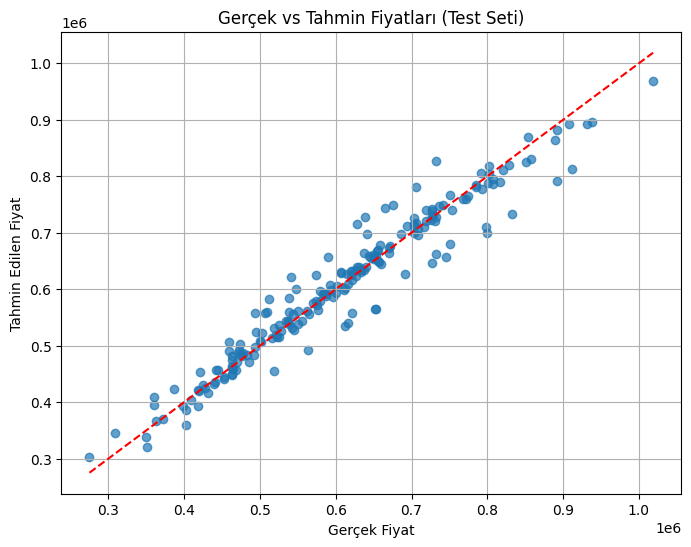

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot: Gerçek vs Tahmin
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

# Kırmızı kesikli referans çizgisi (y = x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

# Başlık ve etiketler
plt.title("Gerçek vs Tahmin Fiyatları (Test Seti)")
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")

plt.grid(True)
plt.show()


14. MODELİ KAYDETME (.PKL)

In [19]:
# Modeli dosyaya kaydetmek için gerekli kütüphane
import pickle

# Eğittiğimiz son modeli kaydediyoruz
with open("final_model.pkl", "wb") as file:
    pickle.dump(model_ols, file)

print("Model başarıyla kaydedildi")


Model başarıyla kaydedildi
